# Using 'Isotope' class for Picarro calculations

In [1]:
cd ..

C:\Users\csas1756\Documents\GitHub\picarro-calculator


This notebook makes use of a new python class: Isotope.
This class and its methods are found in the module Picarro, which we import below.

In [2]:
import Picarro as pica

## Get a full run of the data
In the Picarro module, it is possible to directly call for a full run of the data.

This takes the form of:

   ```RUN = Picarro.FullRun(filename)```

and returns two instances of the Merged class.

In [3]:
RUN = pica.FullRun("example_data/HKDS2009_IsoWater_20191117_122133.csv")

Running the corrections for Oxygen 
 ... 
 ...
creating a directory to store the data
Checking: Ars-10-19 ...
Standard dev is good
Checking: B.zal-niz-10-19 ...
Standard dev is good
Checking: B.zal-verh-10-19 ...
Standard dev is good
Checking: H10-18 ...
Standard dev is good
Checking: H11-18 ...
Standard dev is good
Checking: H12-18 ...
Standard dev is good
Checking: Kapel-suh-z-10-19 ...
Standard dev is good
Checking: L01-19 ...
Standard dev is good
Checking: L02-19 ...
Standard dev is good
Checking: L03-19 ...
Standard dev is good
Checking: L04-19 ...
Standard dev is good
Checking: L10-18 ...
Standard dev is good
Checking: L11-18 ...
Standard dev is good
Checking: L12-18 ...
get rid of measurements  0 and 1
Checking: Podz-10-19 ...
Standard dev is good
Checking: Sverd-niz-10-19 ...
Standard dev is good
Checking: Sverd-verh-10-19 ...
Standard dev is good
Checking: Vhod-oz-10-19 ...
Standard dev is good
Checking: os-Perm-10-19 ...
Standard dev too high get rid of measurement 4
Measured

## Overview of the Isotope class

In the **Isotope** class, a variety of methods are available, so of which are used discreetly in the `FullRun()` function above.

They are:

For an initial treatment of the data:
```
readRaw() 
checkEmpty()
checkVolume()
runSummary()
```

For the computation of correction coefficients (workhorse of the class)
```
IsotopeSelect()
initMemCoeffs()
Optimize()
MemoryCorrection()
driftCorrect()
VSMOWcorrect()
```

For additional checks
```
getMeanSDs()
checkStandards()
```

For plotting convenience:

```
plotSummary()
memCorrPlot()
driftCorrPlot()
VSMOWCorrPlot()
```

## Other functions of the Picarro module

Below are a list of other functions available within the Picarro module:

```
1) Run()
2) FullRun()
3) Merge()
4) OverviewPlot()
5) DatatoCSV()
```

#### 1 Picarro.Run()

This function takes in two arguments: 
1. Isotope of choice: "O" or "D"
2. Filename: the path to csv data

Returns an object of class **Isotope**

An example usage: 

``` Isotope = Picarro.Run(isotope,path/to/file)```

#### 2 Picarro.FullRun()

This function takes in one argument:
1. Filename: the path to csv data

It returns one object of class **Merge**. This instance of class **Merged** has two class variables: O18 and D, which are themselves of Class **Isotope**, so all the above methods can be called on them.

Example usage:

``` RUN = Picarro.FullRun(path/to_file)```

*Note that this is what was done in the cells above, for the 'quick and dirty' full run of the data*



#### 3 Picarro.Merge()

This function takes two arguments; each must be an instance of class **Isotope**. It returns a pandas DataFrame, containing the summary data of the run.

Example usage: 

``` df = Picarro.Merge(Iso1,Iso2)```



No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


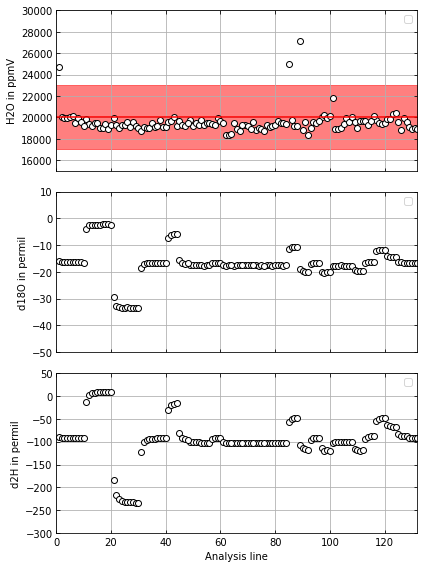

In [4]:
RUN.O18.plotSummary()

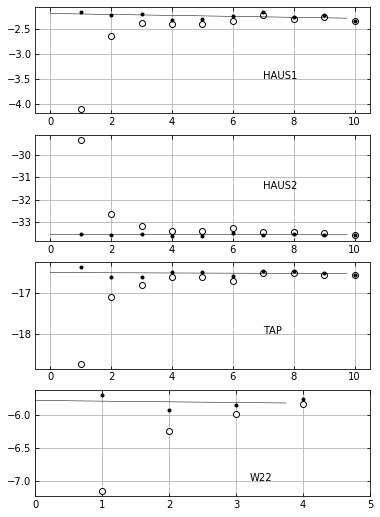

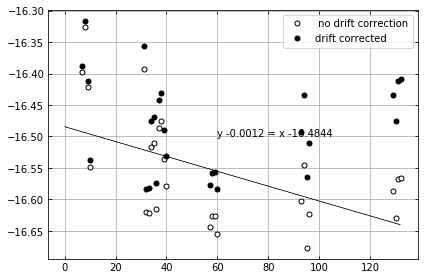

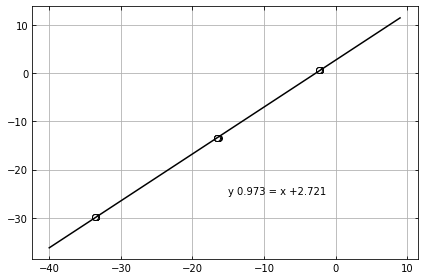

In [5]:
RUN.O18.memCorrPlot("O")
RUN.O18.driftCorrPlot("O")
RUN.O18.VSMOWCorrPlot("O")

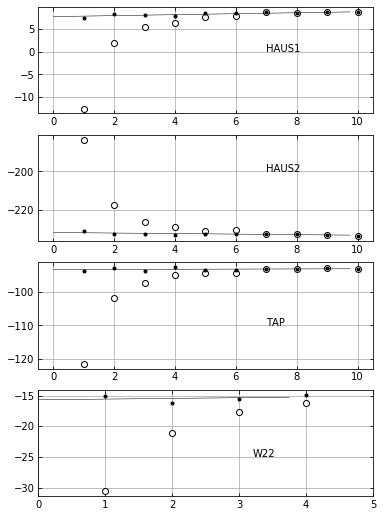

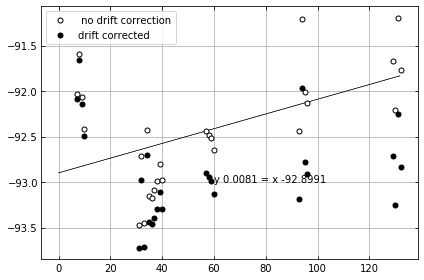

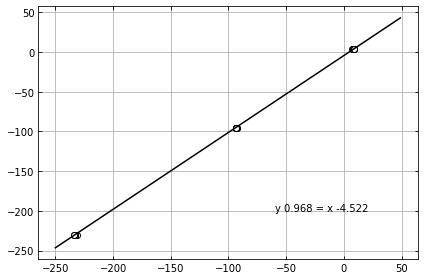

In [6]:
RUN.D.memCorrPlot("H")
RUN.D.driftCorrPlot("H")
RUN.D.VSMOWCorrPlot("H")

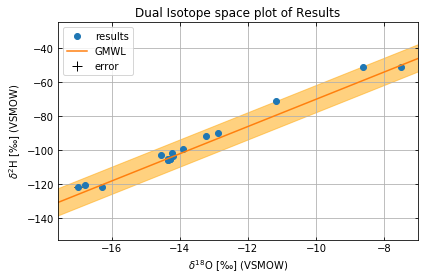

In [7]:
RUN.Plot()

#### 4 Picarro.OverviewPlot()

This function takes two arguments; each must be an instance of class **Isotope**. It enables the plotting of the summary data.

Example usage:

```Picarro.OverviewPlot(Iso1,Iso2)```


#### 5 Picarro.DatatoCSV()

This function takes two arguments; each must be an instance of class **Isotope**. The function writes the data to csv file for convenience of the user. 

Further development should include:

1. Checking that the file does not already exist.
2. Writing a new file it does not.

Example usage:

```Picarro.DatatoCSV(Iso1,Iso2)```



In [6]:
RUN.coeffs

,O,H
1,0.844486,0.750000
2,0.969838,0.932196
3,0.987590,0.971616
4,0.993221,0.982991
5,0.993221,0.993035
6,0.993221,0.993035
7,0.996898,1.000000
8,0.996898,1.000000
9,0.997435,1.000000
10,1.000000,1.000000


In [5]:
RUN.suggestedReruns()

Checking for triplicates...
This was a good run
Checking for high standard deviations ...
Suggested reruns for following samples, which had high standard deviations
Identifier 1  Identifier 2
L12-18        YD             -16.985277
Name: d18O vsmow, dtype: float64


Checking for samples lying outside of the GWML ...
Suggested reruns for following samples, which were outside of the GMWL
Identifier 1  Identifier 2
H11-18        YD             -11.172672
HAUS1         _Standard        0.563308
Name: d18O vsmow, dtype: float64


